In [184]:
import kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
!kaggle datasets download -d ashfakyeafi/spam-email-classification


Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): apache-2.0




  0%|          | 0.00/207k [00:00<?, ?B/s]
100%|██████████| 207k/207k [00:00<00:00, 49.3MB/s]


In [6]:
import zipfile

with zipfile.ZipFile("spam-email-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("spam_dataset")

print("Selesai diekstrak.")


Selesai diekstrak.


In [183]:
df = pd.read_csv('spam_dataset\email.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Asus\AppData\Local\Temp\ipykernel_23544\1334858278.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('spam_dataset\email.csv')


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
df.describe(include='all')

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
df_spam = df[df["Category"] == "spam"]
df_ham =  df[df["Category"] == "ham"]

print(len(df_spam))
print(len(df_ham))

747
4825


In [33]:
df = df.drop(df[df['Category']=='{"mode":"full"'].index)

In [34]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

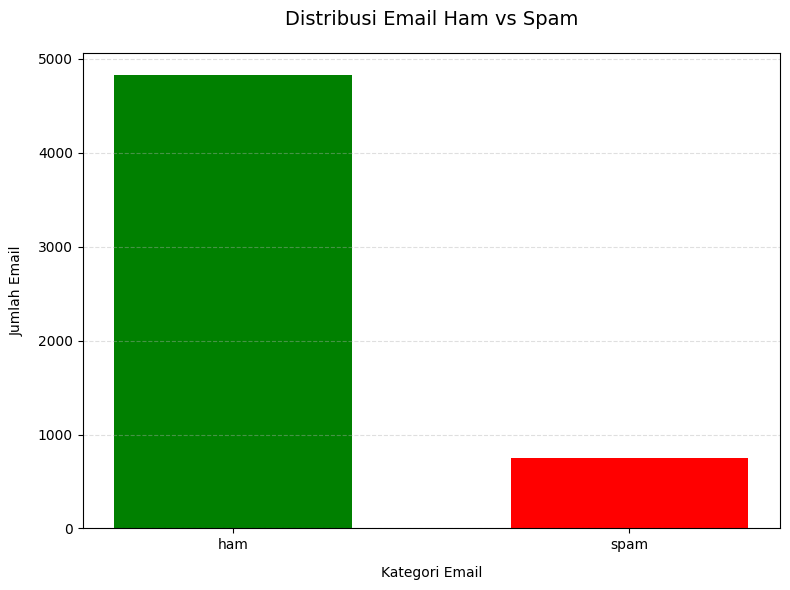

In [35]:
categories = df['Category'].unique().tolist()
counts = [len(df_ham), len(df_spam)]  

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat barplot dasar
bars = ax.bar(categories, counts, 
              color=['green', 'red'],  # Warna berbeda untuk tiap kategori
              width=0.6)  # Lebar bar

# Customization
ax.set_title('Distribusi Email Ham vs Spam', pad=20, fontsize=14)
ax.set_xlabel('Kategori Email', labelpad=10)
ax.set_ylabel('Jumlah Email', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [36]:
df_ham_resample= resample(df_ham,replace=False,n_samples=len(df_spam),random_state=42)

print(len(df_spam))
print(len(df_ham_resample))

747
747


In [39]:
df = pd.concat([df_ham_resample,df_spam],ignore_index=True, )
df

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...
...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...


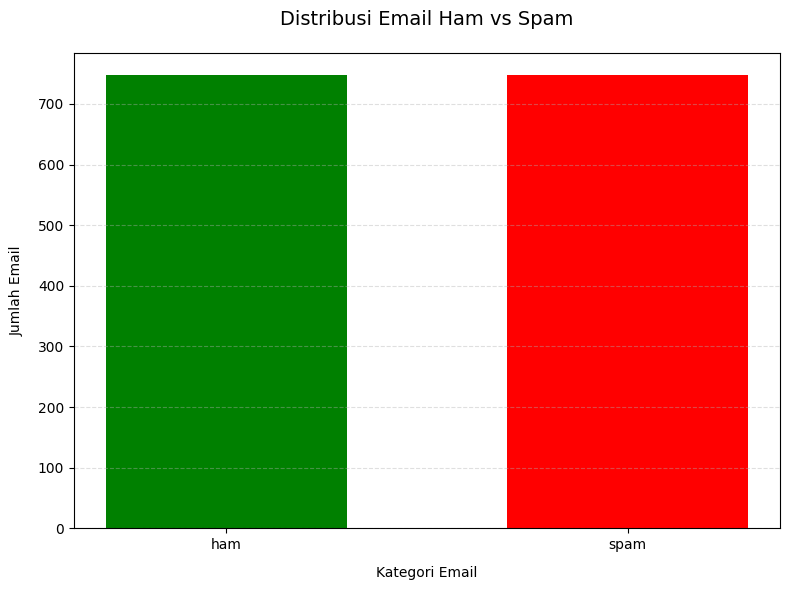

In [40]:
categories = df['Category'].unique().tolist()
counts = [len(df_ham_resample), len(df_spam)]  

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat barplot dasar
bars = ax.bar(categories, counts, 
              color=['green', 'red'],  # Warna berbeda untuk tiap kategori
              width=0.6)  # Lebar bar

# Customization
ax.set_title('Distribusi Email Ham vs Spam', pad=20, fontsize=14)
ax.set_xlabel('Kategori Email', labelpad=10)
ax.set_ylabel('Jumlah Email', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [41]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(128)

In [43]:
df = df.drop_duplicates()

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.describe(include='all')

,Category,Message
count,1366,1366
unique,2,1366
top,ham,This is the 2nd time we have tried 2 contact u...
freq,725,1


In [47]:
le = LabelEncoder()
y = le.fit_transform(df['Category'])
df

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...
...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [48]:
tfidf = TfidfVectorizer(max_features=1000)

message_tfidf = tfidf.fit_transform(df['Message'])
print(message_tfidf.shape)


(1366, 1000)


In [49]:
print(message_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
X_train,X_test,y_train,y_test = train_test_split(message_tfidf,y,test_size=0.2 ,random_state=42)



In [175]:
print("Jumlah data total :", message_tfidf.shape[0])
print("Jumlah data train(fitur) :", X_train.shape[0])
print("Jumlah data train (label) :", y_train.shape[0])
print("Jumlah data test(fitur)  :", X_test.shape[0])
print("Jumlah data test(label)  :", y_test.shape[0])

Jumlah data total : 1366
Jumlah data train(fitur) : 1092
Jumlah data train (label) : 1092
Jumlah data test(fitur)  : 274
Jumlah data test(label)  : 274


In [51]:
model = LogisticRegression()
model.fit(X_train,y_train)
 
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

print(f"Akurasi Train: {train_acc:.4f}")

Akurasi Train: 0.9725


In [52]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9525547445255474
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       150
           1       0.98      0.91      0.95       124

    accuracy                           0.95       274
   macro avg       0.96      0.95      0.95       274
weighted avg       0.95      0.95      0.95       274

Confusion Matrix:
 [[148   2]
 [ 11 113]]


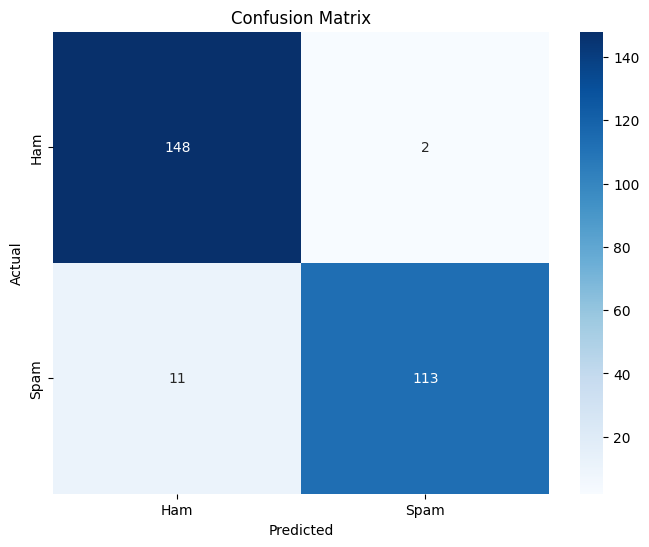

In [185]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(model, 'spam_model.pkl')

['spam_model.pkl']